In [43]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
import statsmodels.api as sm


import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [4]:
data = pd.read_csv('./cereal.csv')
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [33]:
calories = data['calories'].values

In [34]:
calories

array([ 70, 120,  70,  50, 110, 110, 110, 130,  90,  90, 120, 110, 120,
       110, 110, 110, 100, 110, 110, 110, 100, 110, 100, 100, 110, 110,
       100, 120, 120, 110, 100, 110, 100, 110, 120, 120, 110, 110, 110,
       140, 110, 100, 110, 100, 150, 150, 160, 100, 120, 140,  90, 130,
       120, 100,  50,  50, 100, 100, 120, 100,  90, 110, 110,  80,  90,
        90, 110, 110,  90, 110, 140, 100, 110, 110, 100, 100, 110],
      dtype=int64)

In [35]:
rating = data['rating'].values

In [30]:
rating

array([68.402973, 33.983679, 59.425505, 93.704912, 34.384843, 29.509541,
       33.174094, 37.038562, 49.120253, 53.313813, 18.042851, 50.764999,
       19.823573, 40.400208, 22.736446, 41.445019, 45.863324, 35.782791,
       22.396513, 40.448772, 64.533816, 46.895644, 36.176196, 44.330856,
       32.207582, 31.435973, 58.345141, 40.917047, 41.015492, 28.025765,
       35.252444, 23.804043, 52.076897, 53.371007, 45.811716, 21.871292,
       31.072217, 28.742414, 36.523683, 36.471512, 39.241114, 45.328074,
       26.734515, 54.850917, 37.136863, 34.139765, 30.313351, 40.105965,
       29.924285, 40.69232 , 59.642837, 30.450843, 37.840594, 41.50354 ,
       60.756112, 63.005645, 49.511874, 50.828392, 39.259197, 39.7034  ,
       55.333142, 41.998933, 40.560159, 68.235885, 74.472949, 72.801787,
       31.230054, 53.131324, 59.363993, 38.839746, 28.592785, 46.658844,
       39.106174, 27.753301, 49.787445, 51.592193, 36.187559])

In [32]:
indx = np.argwhere(np.isnan(calories))
print(indx)

[]


In [39]:
calories = np.delete(calories,0)
rating = np.delete(rating,0)

In [40]:
len(calories)

76

In [41]:
len(rating)

76

In [44]:
calories2 = sm.add_constant(calories)
lm = sm.OLS(rating, calories2)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     61.71
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           2.43e-11
Time:                        12:22:37   Log-Likelihood:                -283.88
No. Observations:                  76   AIC:                             571.8
Df Residuals:                      74   BIC:                             576.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.6090      6.759     13.998      0.000      81.142     108.076
x1            -0.4869      0.062     -7.856      0.000      -0.610      -0.363
==============================================================================
Omnibus:                        1.264   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                1.282
Skew:                           0.222   Prob(JB):                        0.527
Kurtosis:                       2.544   Cond. No.                         625.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
lm.params

array([94.609043  , -0.48694007])

In [46]:
y = 94.609043 + -0.48694007*(1)
y

94.12210293

In [47]:
new_line = np.linspace(calories.min(), calories.max())
new_line = sm.add_constant(new_line)
y_hat = lm.predict(new_line)

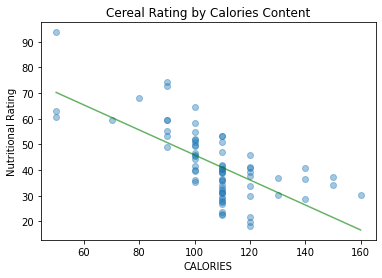

In [48]:
plt.scatter(calories, rating, alpha = 0.4)
plt.xlabel("CALORIES")
plt.ylabel("Nutritional Rating")
plt.title("Cereal Rating by Calories Content")
plt.plot(new_line[:, 1], y_hat, 'g', alpha=0.6)

In [49]:
lm.resid

array([ -2.19255581,  -1.09773322,  23.44287241,  -6.66079249,
       -11.53609449,  -7.87154149,   5.73172787,  -1.66418386,
         2.52937614, -18.13338381,   9.71936351, -16.35266181,
        -0.64542749, -18.30918949,   0.39938351,  -0.05171217,
        -5.26284449, -18.64912249,  -0.59686349,  18.61877983,
         5.85000851,  -9.73884017,  -1.58418017,  -8.83805349,
        -9.60966249,  12.43010483,   4.74081219,   4.83925719,
       -13.01987049, -10.66259217, -17.24159249,   6.16186083,
        12.32537151,   9.63548119, -14.30494281,  -9.97341849,
       -12.30322149,  -4.52195249,  10.03407856,  -1.80452149,
        -0.58696217, -14.31112049,   8.93588083,  15.56883024,
        12.57173224,  13.61471892,  -5.80907117,  -6.25194981,
        14.25488656,   8.85840014,  -0.85599113,   1.66435919,
        -4.41149617,  -9.50592759,  -7.25639459,   3.59683783,
         4.91335583,   3.08296219,  -6.21163617,   4.54870514,
         0.95329751,  -0.48547649,  12.58204746,  23.68

In [50]:
lm.resid[10]

9.719363508620738

In [52]:
infl = lm.get_influence()
print(infl.summary_table())


       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0     33.984     36.176      0.000     -0.215      0.019     -0.030     -0.214     -0.030
         1     59.426     60.523      0.000     -0.110      0.064     -0.029     -0.110     -0.029
         2     93.705     70.262      0.460      2.450      0.133      0.960      2.539      0.994
         3     34.385     41.046      0.003     -0.653      0.013     -0.076     -0.650     -0.076
         4     29.510     41.046      0.009     -1.130      0.013     -0.132     -1.133     -0.132
         5     33.174     41.046      0.004     -0.771      0.013     -0.090     -0.769     -0.090
         6     37.039     31.307      0.005      0.567      0.032      0.103      0.564      0.102
         7